In [1]:
import torch
torch.cuda.is_available() # if True, GPU is available.

True

Currently, all dataset is under `data`. \
Let's Split the dataset into train/val/test.

In [3]:
import os
import random
import shutil

def split_dataset(data_dir, output_dir, train_ratio=0.70, val_ratio=0.15, test_ratio=0.15):
    """
    Splits a dataset into training, validation, and test sets.

    Parameters:
        data_dir (str): Path to the directory with the original dataset. This directory should contain
                        one subdirectory per class.
        output_dir (str): Path to the directory where the split dataset will be stored.
                          Three subdirectories 'train', 'val', and 'test' will be created.
        train_ratio (float): Proportion of samples to use for training.
        val_ratio (float): Proportion of samples to use for validation.
        test_ratio (float): Proportion of samples to use for testing.
    """

    # Define output directories
    train_dir = os.path.join(output_dir, 'train')
    val_dir = os.path.join(output_dir, 'val')
    test_dir = os.path.join(output_dir, 'test')

    # Create directories if they don't exist
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(val_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)

    # Helper function: Count total files in a directory and its subdirectories
    def count_files(directory):
        return sum(len(files) for _, _, files in os.walk(directory))

    # Helper function: Count files per class (each subdirectory represents a class)
    def count_files_per_class(directory):
        class_counts = {}
        for class_name in os.listdir(directory):
            class_dir = os.path.join(directory, class_name)
            if os.path.isdir(class_dir):
                class_counts[class_name] = len([f for f in os.listdir(class_dir)
                                                 if os.path.isfile(os.path.join(class_dir, f))])
        return class_counts

    # Iterate over each class in the original dataset
    for class_name in os.listdir(data_dir):
        class_dir = os.path.join(data_dir, class_name)

        # Skip if it's not a directory
        if not os.path.isdir(class_dir):
            continue

        # Create corresponding class directories in train, val, and test folders
        os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
        os.makedirs(os.path.join(val_dir, class_name), exist_ok=True)
        os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)

        # Get list of files in the class directory (ignoring subdirectories)
        files = [f for f in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, f))]
        random.shuffle(files)  # Shuffle files to randomize the split

        # Calculate split indices
        train_split = int(len(files) * train_ratio)
        val_split = train_split + int(len(files) * val_ratio)

        # Split files into train, validation, and test sets
        train_files = files[:train_split]
        val_files = files[train_split:val_split]
        test_files = files[val_split:]

        # Copy files to the respective directories
        for file in train_files:
            shutil.copy(os.path.join(class_dir, file),
                        os.path.join(train_dir, class_name, file))
        for file in val_files:
            shutil.copy(os.path.join(class_dir, file),
                        os.path.join(val_dir, class_name, file))
        for file in test_files:
            shutil.copy(os.path.join(class_dir, file),
                        os.path.join(test_dir, class_name, file))

    # Print overall statistics
    print("Data split completed!")
    print(f"Total samples in the original dataset ({data_dir}): {count_files(data_dir)}")
    print(f"Total samples in the training set ({train_dir}): {count_files(train_dir)}")
    print(f"Total samples in the validation set ({val_dir}): {count_files(val_dir)}")
    print(f"Total samples in the test set ({test_dir}): {count_files(test_dir)}")

    # Function to print class-wise statistics
    def print_class_statistics(directory, description):
        print(f"\n{description} class statistics:")
        class_counts = count_files_per_class(directory)
        for class_name, count in class_counts.items():
            print(f"  {class_name}: {count} files")
        print(f"Total: {sum(class_counts.values())} files")

    print_class_statistics(data_dir, "Original dataset")
    print_class_statistics(train_dir, "Training set")
    print_class_statistics(val_dir, "Validation set")
    print_class_statistics(test_dir, "Test set")

In [4]:
# Define directories for F
original_data_dir = 'data/classification/F'
split_output_dir = 'split/classification/F'

# Call the function to split the dataset
split_dataset(original_data_dir, split_output_dir)

Data split completed!
Total samples in the original dataset (data/classification/F): 712
Total samples in the training set (split/classification/F/train): 497
Total samples in the validation set (split/classification/F/val): 106
Total samples in the test set (split/classification/F/test): 109

Original dataset class statistics:
  Healthy: 240 files
  Gl9: 241 files
  Gl6: 231 files
Total: 712 files

Training set class statistics:
  Healthy: 168 files
  Gl9: 168 files
  Gl6: 161 files
Total: 497 files

Validation set class statistics:
  Healthy: 36 files
  Gl9: 36 files
  Gl6: 34 files
Total: 106 files

Test set class statistics:
  Healthy: 36 files
  Gl9: 37 files
  Gl6: 36 files
Total: 109 files


In [5]:
# Define directories for F
original_data_dir = 'data/classification/G'
split_output_dir = 'split/classification/G'

# Call the function to split the dataset
split_dataset(original_data_dir, split_output_dir)

Data split completed!
Total samples in the original dataset (data/classification/G): 711
Total samples in the training set (split/classification/G/train): 496
Total samples in the validation set (split/classification/G/val): 105
Total samples in the test set (split/classification/G/test): 110

Original dataset class statistics:
  Healthy: 239 files
  Gl9: 241 files
  Gl6: 231 files
Total: 711 files

Training set class statistics:
  Healthy: 167 files
  Gl9: 168 files
  Gl6: 161 files
Total: 496 files

Validation set class statistics:
  Healthy: 35 files
  Gl9: 36 files
  Gl6: 34 files
Total: 105 files

Test set class statistics:
  Healthy: 37 files
  Gl9: 37 files
  Gl6: 36 files
Total: 110 files


Good! 3 Different datasets (for 3 different model) are successfully prepared!

In [6]:
# Define directories for F
original_data_dir = 'data/classification/Merged'
split_output_dir = 'split/classification/Merged'

# Call the function to split the dataset
split_dataset(original_data_dir, split_output_dir)

Data split completed!
Total samples in the original dataset (data/classification/Merged): 712
Total samples in the training set (split/classification/Merged/train): 497
Total samples in the validation set (split/classification/Merged/val): 106
Total samples in the test set (split/classification/Merged/test): 109

Original dataset class statistics:
  Gl_6: 231 files
  Healthy: 240 files
  Gl_9: 241 files
Total: 712 files

Training set class statistics:
  Gl_6: 161 files
  Healthy: 168 files
  Gl_9: 168 files
Total: 497 files

Validation set class statistics:
  Gl_6: 34 files
  Healthy: 36 files
  Gl_9: 36 files
Total: 106 files

Test set class statistics:
  Gl_6: 36 files
  Healthy: 36 files
  Gl_9: 37 files
Total: 109 files


Demo script for Resnet. \
Using `train_all_model.py`, it turns out this architecture works the best.

In [ ]:
from models.resnet_classifier import *
from pytorch_lightning.callbacks import ModelCheckpoint, EarlyStopping
import pytorch_lightning as pl
import torch

from pathlib import Path
from datetime import datetime

# Configuration
DATA_ROOT = Path("split")  # Update this path
train_path = DATA_ROOT/"train"
val_path = DATA_ROOT/"val"
test_path = DATA_ROOT/"test"

model_config = {
    "num_classes": 3,
    "resnet_version": 101,
    "train_path": train_path,
    "val_path": val_path,
    "test_path": test_path,
    "optimizer": "adam",
    "lr": 1e-3,
    "batch_size": 32,
    "transfer": True,
    "tune_fc_only": True
}

# Initialize model
model = ResNetClassifier(**model_config)


# Create a timestamp and get architecture name
now = datetime.now().strftime("%Y%m%d_%H%M%S")
arch = f"resnet{model_config['resnet_version']}"

# Training setup
checkpoint_cb = ModelCheckpoint(
    # Save checkpoints inside "checkpoints/{now}" folder.
    dirpath=f"checkpoints/{now}",
    # The filename will include the model architecture and epoch number.
    filename=f"{arch}_epoch{{epoch}}.pth",  # Note the double curly braces around epoch are needed for formatting.
    monitor="val_acc",
    mode="max",
    save_top_k=1,
)

early_stop_cb = EarlyStopping(
    monitor="val_acc",
    patience=20,
    mode="max"
)

trainer = pl.Trainer(
    max_epochs=120,
    callbacks=[checkpoint_cb, early_stop_cb],
    accelerator="auto",
    devices=1,
    enable_progress_bar=True,
    log_every_n_steps=20
)

# Train the model
trainer.fit(model)

# Test the model (if test set available)
if test_path.exists():
    trainer.test(ckpt_path="best")


# Construct dynamic filename for the final model
final_filename = f"{arch}_final_{now}.pth"

# Save final model weights with the dynamic filename
torch.save(model.resnet_model.state_dict(), final_filename)

/opt/conda/envs/realmmlab/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA A100-SXM4-40GB') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name           | Type                      | Params | Mode 
---------------------------------------------------------------------
0 | loss_fn        | CrossEntropyLoss          | 0      | train
1 | acc            | 

Epoch 0: 100%|██████████| 532/532 [00:32<00:00, 16.20it/s, v_num=58, train_loss_step=0.158, train_acc_step=1.000, val_loss=1.960, val_acc=0.324, train_loss_epoch=1.460, train_acc_epoch=0.363]

`Trainer.fit` stopped: `max_epochs=1` reached.


Epoch 0: 100%|██████████| 532/532 [00:33<00:00, 15.70it/s, v_num=58, train_loss_step=0.158, train_acc_step=1.000, val_loss=1.960, val_acc=0.324, train_loss_epoch=1.460, train_acc_epoch=0.363]


Restoring states from the checkpoint path at /home/huijo_hexafarms_com/test/checkpoints/20250221_011549/resnet101_epochepoch=0.pth.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at /home/huijo_hexafarms_com/test/checkpoints/20250221_011549/resnet101_epochepoch=0.pth.ckpt


Testing DataLoader 0: 100%|██████████| 106/106 [00:03<00:00, 30.27it/s]


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.33018869161605835    │
│          test_f1          │    0.33018869161605835    │
│         test_loss         │    1.9517918825149536     │
│      test_precision       │    0.33018869161605835    │
│        test_recall        │    0.33018869161605835    │
└───────────────────────────┴───────────────────────────┘

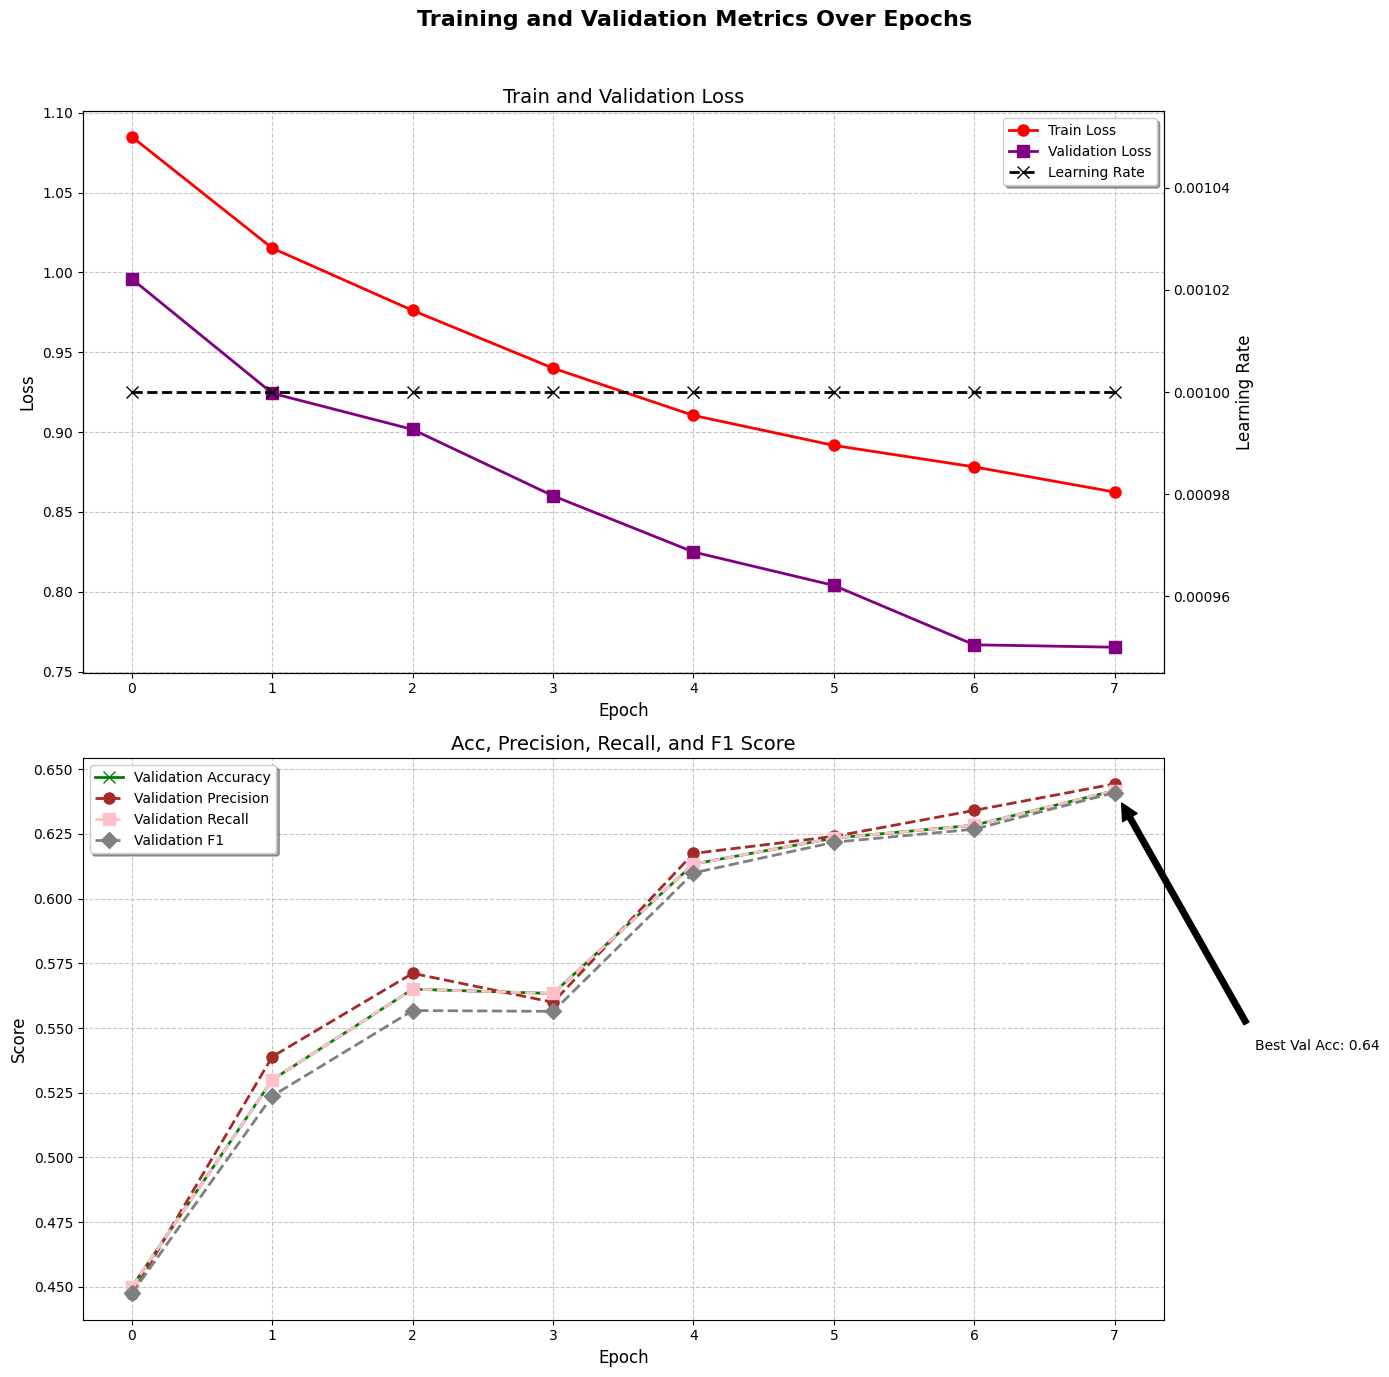

In [15]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def plot_metrics(csv_directory, highest_version=None):
    # Find the highest version folder
    version_folders = [f for f in os.listdir(csv_directory) if f.startswith("version_")]
    if not version_folders:
        raise FileNotFoundError("No version folders found in the directory.")

    # Determine the highest version number if not provided
    if highest_version is None:
        highest_version = max(version_folders, key=lambda v: int(v.split('_')[1]))
    csv_path = os.path.join(csv_directory, highest_version, 'metrics.csv')

    # Load the CSV data into a DataFrame
    df = pd.read_csv(csv_path)

    # Replace empty strings with NaN so that numeric operations work correctly
    df = df.replace('', float('nan'))

    # Group by epoch and calculate mean values for each epoch
    df_epoch = df.groupby('epoch').mean().reset_index()

    # Create subplots. (We use three rows; the loss plot (row 0) will include a twin axis for learning rate.)
    fig, axes = plt.subplots(2, 1, figsize=(14, 14))
    fig.suptitle('Training and Validation Metrics Over Epochs', fontsize=16, fontweight='bold')

    # Plot 1: Train/Val Loss with Learning Rate
    l1, = axes[0].plot(df_epoch['epoch'], df_epoch['train_loss_epoch'], label='Train Loss',
                         marker='o', color='red', linestyle='-', linewidth=2, markersize=8)
    l2, = axes[0].plot(df_epoch['epoch'], df_epoch['val_loss'], label='Validation Loss',
                         marker='s', color='purple', linestyle='-', linewidth=2, markersize=8)
    axes[0].set_xlabel('Epoch', fontsize=12)
    axes[0].set_ylabel('Loss', fontsize=12)
    axes[0].set_title('Train and Validation Loss', fontsize=14)
    axes[0].grid(True, linestyle='--', alpha=0.7)

    # Create a second y-axis for the learning rate
    ax_lr = axes[0].twinx()
    # Plot the learning rate from lr_epoch. (If you prefer lr_step instead, change the column name accordingly.)
    l3, = ax_lr.plot(df_epoch['epoch'], df_epoch['lr_epoch'], label='Learning Rate',
                      marker='x', color='black', linestyle='--', linewidth=2, markersize=8)
    ax_lr.set_ylabel('Learning Rate', fontsize=12)

    # Combine legends from both axes
    lines, labels = axes[0].get_legend_handles_labels()
    lines2, labels2 = ax_lr.get_legend_handles_labels()
    axes[0].legend(lines + lines2, labels + labels2, loc='upper right', fontsize=10, frameon=True, shadow=True, facecolor='white')

    # Plot 2: Val Accuracy
    axes[1].plot(df_epoch['epoch'], df_epoch['val_acc'], label='Validation Accuracy',
                 marker='x', color='green', linestyle='-', linewidth=2, markersize=8)
    axes[1].set_xlabel('Epoch', fontsize=12)
    axes[1].set_ylabel('Accuracy', fontsize=12)

    # Add an annotation for the best validation accuracy
    # Find index of the best validation accuracy value within the epoch-aggregated data.
    best_val_idx = df_epoch['val_acc'].idxmax()
    best_val_acc = df_epoch.loc[best_val_idx, 'val_acc']
    axes[1].annotate(f'Best Val Acc: {best_val_acc:.2f}', 
                     xy=(df_epoch.loc[best_val_idx, 'epoch'], best_val_acc), 
                     xytext=(df_epoch.loc[best_val_idx, 'epoch'] + 1, best_val_acc - 0.1),
                     arrowprops=dict(facecolor='black', shrink=0.05),
                     fontsize=10)

    # Plot 3: Precision, Recall, F1
    axes[1].plot(df_epoch['epoch'], df_epoch['val_precision'], label='Validation Precision',
                 marker='o', color='brown', linestyle='--', linewidth=2, markersize=8)
    axes[1].plot(df_epoch['epoch'], df_epoch['val_recall'], label='Validation Recall',
                 marker='s', color='pink', linestyle='--', linewidth=2, markersize=8)
    axes[1].plot(df_epoch['epoch'], df_epoch['val_f1'], label='Validation F1',
                 marker='D', color='gray', linestyle='--', linewidth=2, markersize=8)
    axes[1].set_xlabel('Epoch', fontsize=12)
    axes[1].set_ylabel('Score', fontsize=12)
    axes[1].set_title('Acc, Precision, Recall, and F1 Score', fontsize=14)
    axes[1].legend(loc='upper left', fontsize=10, frameon=True, shadow=True, facecolor='white')
    axes[1].grid(True, linestyle='--', alpha=0.7)

    # Adjust layout so that labels don't overlap
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Example usage:
# Make sure to update 'lightning_logs' with the actual path where your version folders are stored.
plot_metrics('lightning_logs')